# DNN( Deep Neural Network, 심층 신경망 )

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.set_option( 'display.max_columns', 20 )
pd.set_option( 'display.max_colwidth', 20 )
pd.set_option( 'display.unicode.east_asian_width', True )

import warnings
warnings.filterwarnings( 'ignore' )

## 자동차 연비 예측 모델 ( MLP 딥러닝 모델 - 단순 선형 회귀 모델 )

* MLP( Multipele Layer Perceptron )

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

### 데이터 준비

In [7]:
mpg_df = pd.read_csv( '../data/auto-mpg-clean.csv' )

In [8]:
mpg_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [9]:
df = mpg_df[:]
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevel...
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [10]:
df = df.drop( [ 'name' ], axis = 1 )
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [11]:
origin = df.pop( 'origin' )

df[ 'USA' ] = ( origin == 1 ) * 1.0
df[ 'EU' ] = ( origin == 2 ) * 1.0
df[ 'JPN' ] = ( origin == 3 ) * 1.0

In [12]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,USA,EU,JPN
0,18.0,8,307.0,130.0,3504.0,12.0,70,1.0,0.0,0.0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1.0,0.0,0.0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1.0,0.0,0.0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1.0,0.0,0.0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1.0,0.0,0.0


### 입력/정답, 훈련/테스트 데이터 분리

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df[ [ 'weight' ] ].to_numpy()
y = df[ [ 'mpg' ] ].to_numpy()

In [15]:
print( f'X shape : {X.shape}' )
print( f'y shape : {y.shape}' )

X shape : (392, 1)
y shape : (392, 1)


In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42
)

In [17]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (313, 1)
y_train shape : (313, 1)

X_test shape : (79, 1)
y_test shape : (79, 1)


### feature scaling

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
ss = StandardScaler()
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

### MLP 모델 생성 및 컴파일

In [124]:
def build_model():
    model = keras.Sequential()
    model.add( layers.Dense( 256, activation = 'relu', 
                                 input_shape = ( X_train_scaled.shape[ 1 ], ) ) )
    model.add( layers.Dense( 256, activation = 'relu' ) )
    model.add( layers.Dense( 256, activation = 'relu' ) )
    model.add( layers.Dense( 1 ) )
    
    optimizer = tf.keras.optimizers.RMSprop( 0.0001 ) # 0.0001 : 학습률( learning rate )
    model.compile( loss = 'mse', optimizer = optimizer, metrics = [ 'mae', 'mse' ] )
    
    return model

In [77]:
model = build_model()

In [78]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               256       
_________________________________________________________________
dense_13 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 129       
Total params: 16,897
Trainable params: 16,897
Non-trainable params: 0
_________________________________________________________________


In [43]:
keras.utils.plot_model( model )

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


### 모델 훈련

In [57]:
# callback 함수 : 함수내에서 자동으로 호출하는 함수
# 훈련 과정에 대한 진행 정도를 표시하는 함수
class PrintDot( keras.callbacks.Callback ):
    def on_epoch_end( self, epoch, logs ):
        if epoch % 100 == 0:
            print( '' )
        print( '.', end = '' )

In [72]:
history = model.fit( X_train_scaled, y_train, epochs = 1000,
                     validation_split = 0.2, verbose = 0, 
                     callbacks = [ PrintDot() ] )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [45]:
type( history )

tensorflow.python.keras.callbacks.History

In [49]:
history.history.keys()

dict_keys(['loss', 'mae', 'mse', 'val_loss', 'val_mae', 'val_mse'])

In [73]:
hist_df = pd.DataFrame( history.history )
hist_df[ 'epoch' ] = history.epoch
hist_df.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,18.099286,3.097198,18.099285,15.340167,3.033389,15.340167,995
996,18.082002,3.090886,18.082003,15.346871,3.032056,15.346871,996
997,18.090184,3.089158,18.090183,15.347714,3.030309,15.347714,997
998,18.082563,3.094721,18.082563,15.347830,3.032906,15.347830,998
999,18.067605,3.086238,18.067606,15.343149,3.045174,15.343149,999


In [74]:
def plot_metric( history ):
    hist_df = pd.DataFrame( history.history )
    hist_df[ 'epoch' ] = history.epoch
    
    plt.figure( figsize = ( 8, 12 ) )
    plt.subplot( 2, 1, 1 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Mean Abs Error [ mpg ]' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'mae' ], label = 'Train Error' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'val_mae' ], label = 'Val Error' )
    plt.ylim( [ 0, 5 ] )
    plt.legend()
    
    plt.subplot( 2, 1, 2 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Mean Square Error [ $mpg^2$ ]' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'mse' ], label = 'Train Error' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'val_mse' ], label = 'Val Error' )
    plt.ylim( [ 0, 20 ] )
    plt.legend()
    
    plt.show()

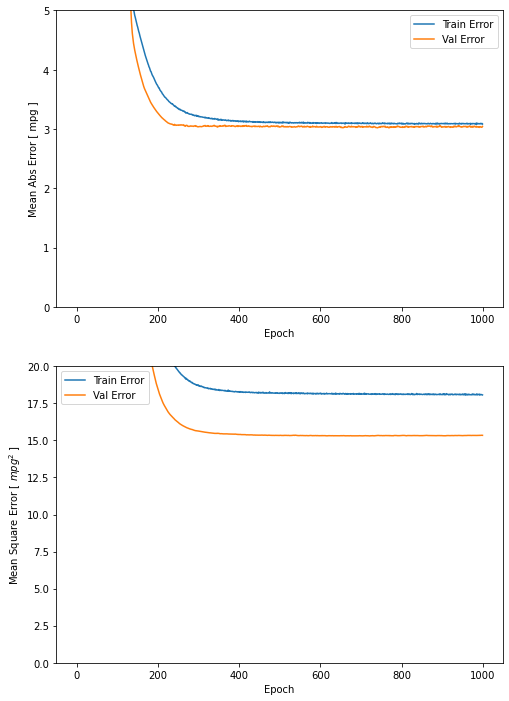

In [75]:
plot_metric( history )

#### 조기 종료를 적용하여 모델 생성

In [79]:
model = build_model()

In [80]:
# EarlyStopping() : 조기 종료
#      patience : 성능 향상을 체크하는 epoch 회수
early_stop = keras.callbacks.EarlyStopping( monitor = 'val_loss', patience = 10 )

history = model.fit( X_train_scaled, y_train, epochs = 1000,
                     validation_split = 0.2, verbose = 0,
                     callbacks = [ early_stop, PrintDot() ] )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................

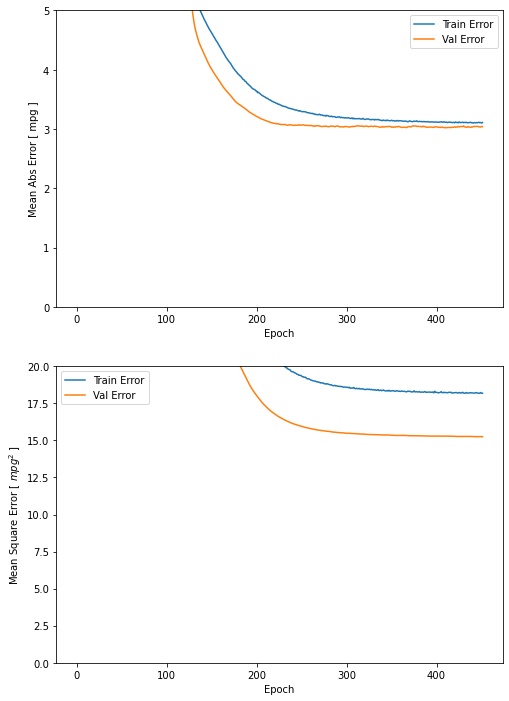

In [83]:
plot_metric( history )

### 평가

In [84]:
loss, mae, mse = model.evaluate( X_test_scaled, y_test, verbose = 2 )

79/1 - 0s - loss: 19.0225 - mae: 3.1297 - mse: 16.6354


In [85]:
print( f'테스트 데이터에 대한 평균 절대 오차 : {mae:10.2f}' )

테스트 데이터에 대한 평균 절대 오차 :       3.13


### 예측 

In [89]:
predicts = model.predict( X_test_scaled ).flatten()

In [90]:
# 예측값
predicts

array([30.332441, 24.313358, 34.87297 , 33.06516 , 24.35776 , 30.729761,
       13.059916, 29.444317, 20.145283, 34.091526, 16.0318  , 23.114586,
       14.056725, 30.54279 , 18.877275, 26.00052 , 21.587261, 28.45102 ,
       25.423334, 26.934278, 23.97593 , 31.021904, 32.715256, 18.25771 ,
       32.97185 , 29.444317, 22.679478, 18.66065 , 33.12347 , 26.836008,
       13.792682, 20.628242, 17.54253 , 25.734129, 13.721479, 32.598625,
       13.253601, 31.068651, 14.29056 , 13.305187, 14.987947, 31.278996,
       32.773575, 29.03531 , 13.216904, 13.076958, 19.982357, 31.021904,
       27.858429, 33.275097, 14.786573, 29.292402, 29.456005, 30.671333,
       23.958168, 17.345863, 20.530565, 23.256664, 28.158873, 29.876694,
       13.021828, 21.738216, 25.15694 , 22.87483 , 26.80035 , 29.970179,
       24.979343, 33.275097, 19.2415  , 14.124042, 27.78001 , 14.980372,
       24.135765, 31.092022, 18.485424, 30.624586, 15.053328, 18.704123,
       31.021906], dtype=float32)

In [92]:
# 정답
y_test.flatten()

array([26. , 21.6, 36.1, 26. , 27. , 28. , 13. , 26. , 19. , 29. , 15. ,
       19. , 16.9, 29. , 16.2, 28. , 20. , 32.4, 27.4, 35. , 22. , 44. ,
       34.1, 18. , 26. , 26. , 21. , 16. , 26. , 22. , 15. , 19.4, 19.2,
       31.6, 13. , 38. , 14. , 25. , 13. , 10. , 13. , 24. , 36. , 26. ,
       14. , 13. , 19. , 37.3, 21. , 29. , 14. , 24. , 28. , 36. , 22. ,
       16. , 20. , 20. , 25. , 25. , 12. , 22.5, 26.8, 23. , 21.1, 25. ,
       25.1, 29. , 19.9, 15. , 22. , 13. , 22. , 18. , 17.6, 28. , 15. ,
       16. , 27. ])

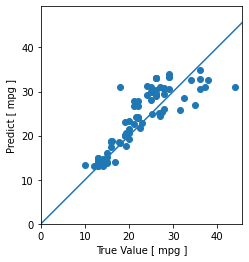

In [93]:
plt.scatter( y_test, predicts )
plt.xlabel( 'True Value [ mpg ]' )
plt.ylabel( 'Predict [ mpg ]' )
plt.axis( 'equal' )
plt.axis( 'square' )
plt.xlim( [ 0, plt.xlim()[ 1 ] ] )
plt.ylim( [ 0, plt.ylim()[ 1 ] ] )
_ = plt.plot( [ -100, 100 ], [ -100, 100 ] )

In [94]:
error = predicts - y_test

In [97]:
len( predicts )

79

In [98]:
len( y_test )

79

In [96]:
error.flatten()

array([  4.33244133,  -1.68664169,   8.87297058, ..., -11.94667244,
        -8.29587746,   4.0219059 ])

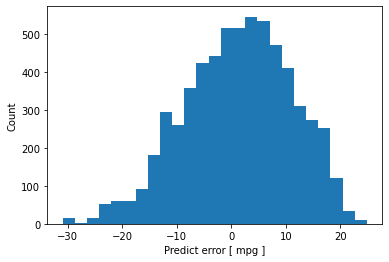

In [101]:
plt.hist( error.flatten(), bins = 25 )
plt.xlabel( 'Predict error [ mpg ]' )
plt.ylabel( 'Count' )
plt.show()

## 자동차 연비 예측 모델 ( MLP 딥러닝 모델 - 다중 선형 회귀 모델 )

In [102]:
X = df[ [ 'cylinders', 'displacement', 'horsepower',
          'weight', 'acceleration' ] ].to_numpy()

In [103]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.2, random_state = 42 
)

In [104]:
print( f'X_train shape : {X_train.shape}' )
print( f'y_train shape : {y_train.shape}' )
print( f'\nX_test shape : {X_test.shape}' )
print( f'y_test shape : {y_test.shape}' )

X_train shape : (313, 5)
y_train shape : (313, 1)

X_test shape : (79, 5)
y_test shape : (79, 1)


In [105]:
ss.fit( X_train )
X_train_scaled = ss.transform( X_train )
X_test_scaled = ss.transform( X_test )

In [125]:
model = build_model()

In [126]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_25 (Dense)             (None, 256)               1536      
_________________________________________________________________
dense_26 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_27 (Dense)             (None, 256)               65792     
_________________________________________________________________
dense_28 (Dense)             (None, 1)                 257       
Total params: 133,377
Trainable params: 133,377
Non-trainable params: 0
_________________________________________________________________


In [127]:
history = model.fit( X_train_scaled, y_train, epochs = 1000,
                     validation_split = 0.2, verbose = 0, 
                     callbacks = [ PrintDot() ] )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

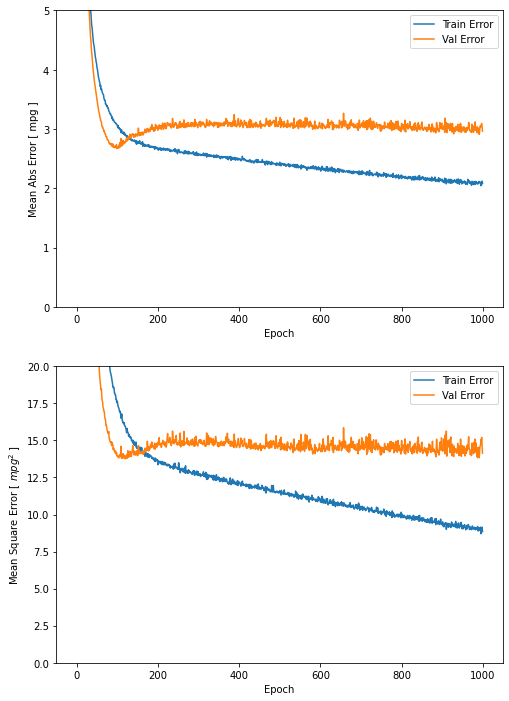

In [128]:
plot_metric( history )

In [129]:
history = model.fit( X_train_scaled, y_train, epochs = 1000,
                     validation_split = 0.2, verbose = 0,
                     callbacks = [ early_stop, PrintDot() ] )


.............

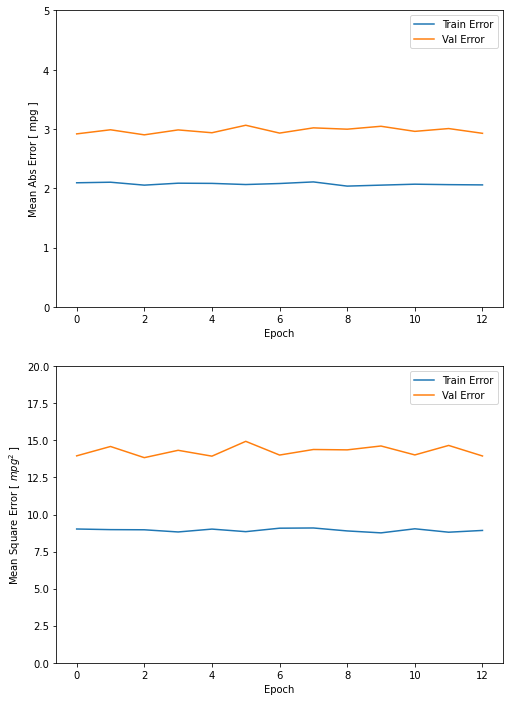

In [130]:
plot_metric( history )

In [131]:
loss, mae, mse = model.evaluate( X_test_scaled, y_test, verbose = 2 )

79/1 - 0s - loss: 12.1109 - mae: 2.8369 - mse: 14.2625


In [132]:
print( f'테스트 데이터에 대한 평균 절대 오차 : {mae:10.2f}' )

테스트 데이터에 대한 평균 절대 오차 :       2.84


In [133]:
predicts = model.predict( X_test_scaled ).flatten()

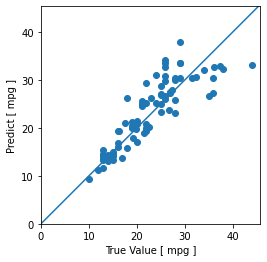

In [134]:
plt.scatter( y_test, predicts )
plt.xlabel( 'True Value [ mpg ]' )
plt.ylabel( 'Predict [ mpg ]' )
plt.axis( 'equal' )
plt.axis( 'square' )
plt.xlim( [ 0, plt.xlim()[ 1 ] ] )
plt.ylim( [ 0, plt.ylim()[ 1 ] ] )
_ = plt.plot( [ -100, 100 ], [ -100, 100 ] )

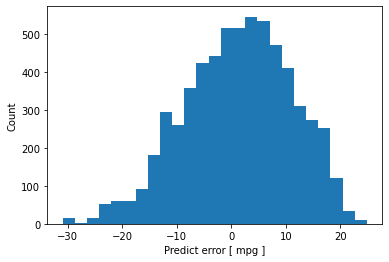

In [136]:
plt.hist( error.flatten(), bins = 25 )
plt.xlabel( 'Predict error [ mpg ]' )
plt.ylabel( 'Count' )
plt.show()

## 타이타닉 사망자 예측 모델 ( MLP 딥러닝 모델 - 분류 모델 )

### 데이터 준비

In [137]:
titanic = pd.read_csv( '../data/titanic_clean.csv' )
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. Willi...",male,35.0,0,0,373450,8.0500,S


In [138]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 데이터 분리

In [139]:
df = titanic[ : ]
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen...",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. Jo...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss....",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. J...",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. Willi...",male,35.0,0,0,373450,8.0500,S


In [141]:
df[ 'Sex' ] = df[ 'Sex' ].map( { 'male': 0, 'female': 1 } ).astype( int )

In [142]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen...",0,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. Jo...",1,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss....",1,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. J...",1,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. Willi...",0,35.0,0,0,373450,8.0500,S


In [145]:
X = df[ [ 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare' ] ].to_numpy()
y = df[ [ 'Survived' ] ].to_numpy()

In [146]:
X.shape

(891, 6)

In [147]:
y.shape

(891, 1)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size = 0.2, random_state = 42 
)

In [149]:
print( X_train.shape, '\t', y_train.shape )
print( X_test.shape, '\t', y_test.shape )

(712, 6) 	 (712, 1)
(179, 6) 	 (179, 1)


### feature scaling

In [151]:
from sklearn.preprocessing import MinMaxScaler

In [166]:
ns = MinMaxScaler()
ns.fit( X_train )
X_train_scaled = ns.transform( X_train )
X_test_scaled = ns.transform( X_test )

In [193]:
def build_model():
    model = keras.Sequential()
    # Flatten층은 입력 데이터를 1차원으로 만들어주는 역활, 학습에는 영향을 주지 않는다.
    model.add( layers.Flatten( input_shape = [ X_train_scaled.shape[ 1 ] ] ) )
    model.add( layers.Dense( 128, activation = 'relu' ) )
    model.add( layers.Dropout( 0.2 ) )
    model.add( layers.Dense( 128, activation = 'relu' ) )
    model.add( layers.Dropout( 0.2 ) )          
    model.add( layers.Dense( 1, activation = 'sigmoid' ) )
    
    model.compile( loss = 'binary_crossentropy',
                   optimizer = 'sgd',
                   metrics = [ 'accuracy' ] )
    
    return model

In [194]:
model = build_model()

In [195]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 6)                 0         
_________________________________________________________________
dense_41 (Dense)             (None, 128)               896       
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_42 (Dense)             (None, 128)               16512     
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 129       
Total params: 17,537
Trainable params: 17,537
Non-trainable params: 0
_________________________________________________

In [196]:
history = model.fit( X_train_scaled, y_train, epochs = 500,
                     validation_split = 0.2, verbose = 0,
                     callbacks = [ PrintDot() ] )


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

In [197]:
def plot_metric_accuracy( history ):
    hist_df = pd.DataFrame( history.history )
    hist_df[ 'epoch' ] = history.epoch
    
    plt.figure( figsize = ( 8, 12 ) )
    plt.subplot( 2, 1, 1 )
    plt.xlabel( 'Epoch' )
    plt.ylabel( 'Accuracy [ Survived ]' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'accuracy' ], label = 'Train Error' )
    plt.plot( hist_df[ 'epoch' ], hist_df[ 'val_accuracy' ], label = 'Val Error' )
    plt.ylim( [ 0, 5 ] )
    plt.legend()

    plt.show()

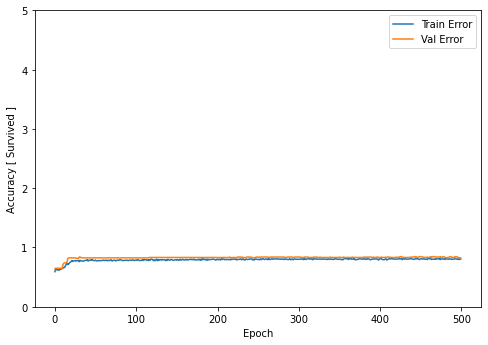

In [198]:
plot_metric_accuracy( history )

In [199]:
loss, accuracy = model.evaluate( X_test_scaled, y_test, verbose = 2 )

print( f'테스트 데이터 정확도 : {accuracy:10.5f}' )

179/1 - 0s - loss: 0.4033 - accuracy: 0.8156
테스트 데이터 정확도 :    0.81564


In [179]:
predict = model.predict( X_test[ :20 ] ).flatten()
predict.round( 2 )

array([0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.], dtype=float32)

In [180]:
predict = model.predict_classes( X_test[ :20 ] )
predict

array([[0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0]], dtype=int32)

In [182]:
count = len( y_test[ :20 ] )
results = []

print( '실제값\t예측값' )
for i in range( count ):
    print( f'{y_test[ i ]}\t{predict[ i ][ 0 ]}' )
    if y_test[ i ] == predict[ i ][ 0 ]:
        results.append( True )
    else:
        results.append( False )

print( f'\n맞은 갯수 : {sum( results )}\t틀린 갯수 : {count - sum( results )}' )
print( f'실제 예측 정확도 : {sum( results ) / count * 100:10.2f}%' )

실제값	예측값
[1]	0
[0]	0
[0]	0
[1]	1
[1]	0
[1]	1
[1]	0
[0]	0
[1]	0
[1]	0
[0]	0
[0]	0
[0]	0
[0]	0
[0]	0
[1]	1
[1]	0
[1]	0
[0]	0
[0]	0

맞은 갯수 : 13	틀린 갯수 : 7
실제 예측 정확도 :      65.00%
